# **Vehicle Routing Problem with Genetic Algorithms**

## Installing MATPLOT DEAP

In [2]:
!pip install matplotlib deap

## Required Libraries

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

## Defining the number of locations and vehicles

In [4]:
num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

## Genetic Algorithm Setup

In [5]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.


## Finish setting up the individuals and population

In [6]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals

## Fitness Function

In [7]:
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Used standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)  # Register the evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

## Plotting Function

In [8]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

## Running the Genetic Algorithm

gen	nevals	avg    	min    
0  	300   	625.189	4.73291
1  	213   	604.184	4.24844
2  	243   	596.2  	3.27042
3  	232   	586.631	5.39387
4  	233   	577.793	4.87859
5  	218   	569.733	4.20667
6  	213   	566.95 	4.20667
7  	233   	563.074	2.65924
8  	219   	555.693	3.22472
9  	209   	549.977	2.03285
10 	224   	550.174	3.22472
11 	230   	555.655	3.22472
12 	230   	553.218	3.22472
13 	217   	549.016	4.48784
14 	231   	552.495	4.48784
15 	250   	556.496	3.36136
16 	238   	548.211	1.22319
17 	236   	542.867	0.362389
18 	225   	544.775	1.22319 
19 	225   	536.098	1.22319 
20 	209   	526.539	1.22319 
21 	232   	529.765	7.50511 
22 	237   	518.068	3.27296 
23 	217   	519.744	3.27296 
24 	227   	519.827	3.367   
25 	246   	521.747	2.54287 
26 	233   	513.692	3.51175 
27 	219   	510.574	5.45725 
28 	229   	506.997	6.32917 
29 	223   	505.915	2.82988 
30 	238   	499.249	2.63268 
31 	225   	489.469	2.82988 
32 	221   	485.273	2.82988 
33 	243   	475.919	2.82988 
34 	232   	446.201	2.82988 
35 	244   

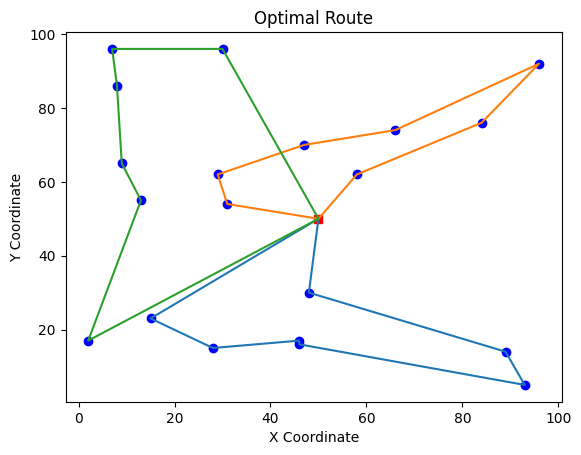

In [9]:
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()
